# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №3. Библиотеки Pandas и Matplotlib

Задание выполнил(а): _Дуенин Роман_

### Общая информация

__Дата выдачи:__ 16.11.2022

__Дедлайн:__ 04:00 27.11.2022

### Оценивание и штрафы

Каждая задача оценивается в 3 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{pandas}} \times 10/48 ,
$$

где $s_{\text{pandas}}$  — количество баллов, которое вы набрали в сумме по задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотекой pandas и matplotlib!

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

Обратите внимание, что практически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Также в некоторых заданиях от вас будет требоваться построить графики. Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением, поскольку в этом ДЗ это тоже оценивается.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

### 1

В этом домашнем задании вы поработаете с данными о пассажирах с затонувшего «Титаника», которые мы уже раннее кратко рассматривали на лекции. 

Описание данных, а также сами данные (откуда их следует скачать) находятся по следующей ссылке:

https://www.kaggle.com/c/titanic/data

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [3]:
train = pd.read_csv('train.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('Строк:', train.shape[0], 'Столбцов:', train.shape[1])

Строк: 891 Столбцов: 12


### 2

Для каждого признака в рассматриваемых данных укажите тип этого признака

*Подсказка. Лекция 3 вам поможет!*

PassangerId - порядковый признак,
Survived - бинарный признак,
Pclass - порядковый признак,
Name - категориальный признак,
Sex - бинарный признак,
Age - вещественный признак,
SibSp - вещественный признак,
Parch - вещественный признак,
Ticket - категориальный признак,
Fare - вещественный признак,
Cabin - порядковый признак,
Embarked - категориальный признак

### 3

Придумайте три какие-нибудь задачи анализа данных, которые можно было бы решать для данного датасета:

1. Задачу регрессии - то есть иными словами предсказания некоего целочисленного результата для каждого объекта
2. Задачу классификации - то есть иными словами отнесения каждого объекта к какому-то одному из двух или более заранее заданных классов (групп)
3. Задачу кластеризации - то есть иными словами разделения всех объектов на неизвестное заранее количество групп по принципу их похожести друг на друга

*Подробнее вы можете прочитать про то, что представляют собой задачи регрессии, классификации, кластеризации, например, в Википедии. Также простым языком и на конкретном примере это расписано, например, вот в этой [статье](https://habr.com/ru/company/simbirsoft/blog/565396/) (в начале)*

1. Предсказание выживет ли пассажир или нет
2. Предсказание к какому классу билета пассажир относится
3. Кластеризация по возрасту и цене билета

### 4

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [5]:
print('Выживших:', round(train.groupby('Survived').count().iloc[1, 0] / train.groupby('Survived').count().sum().iloc[0] * 100, 3), '%')

print('Мужчин выжило:', round(train[train['Survived'] == 1].groupby('Sex').count().loc['male', 'PassengerId'] / train[train['Survived'] == 1].groupby('Sex').count().sum().iloc[0] * 100, 3), '%')
print('Женщин выжило:', round(train[train['Survived'] == 1].groupby('Sex').count().loc['female', 'PassengerId'] / train[train['Survived'] == 1].groupby('Sex').count().sum().iloc[0] * 100, 3), '%')

Выживших: 38.384 %
Мужчин выжило: 31.871 %
Женщин выжило: 68.129 %


### 5

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [6]:
p = train['Pclass'].value_counts()

print('В первом классе ехало:', p.loc[1])
print('Во втором классе ехало:', p.loc[2])
print('В третьем классе ехало:', p.loc[3])
print()
print('В самом многолюдном классе женщин:', train[(train['Pclass'] == 3) & (train['Sex'] == 'female')].count()[0])
print('В самом многолюдном классе мужчин:', train[(train['Pclass'] == 3) & (train['Sex'] == 'male')].count()[0])

В первом классе ехало: 216
Во втором классе ехало: 184
В третьем классе ехало: 491

В самом многолюдном классе женщин: 144
В самом многолюдном классе мужчин: 347


### 6

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки. Что можно сказать на основе результатов, которые вы получаете?

Минимальная стоимость поездки: 0.0
Средняя стоимость поездки: 32.2042079685746
Максимальная стоимость поездки: 512.3292

Минимальная стоимость поездки в Саутгемптоне: 0.0
Средняя стоимость поездки в Саутгемптоне: 27.07981180124218
Максимальная стоимость поездки в Саутгемптоне: 263.0


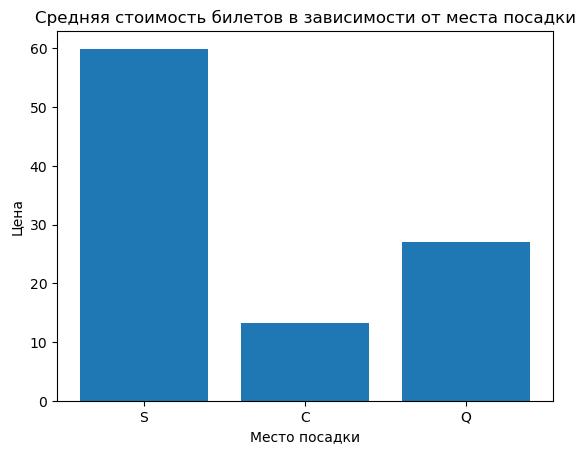

На основе результатов которые мы вывели можно понять, что некоторые из пассажиров Титаника поехали в нем бесплатно, что в городе Southampton была наибольшая средняя стоимость билетов, а в городе Cherbourg наименьшая стоимость.


In [7]:
print('Минимальная стоимость поездки:', train['Fare'].min())
print('Средняя стоимость поездки:', train['Fare'].mean())
print('Максимальная стоимость поездки:', train['Fare'].max())
print()
print('Минимальная стоимость поездки в Саутгемптоне:', train[train['Embarked'] == 'S'].Fare.min())
print('Средняя стоимость поездки в Саутгемптоне:', train[train['Embarked'] == 'S'].Fare.mean())
print('Максимальная стоимость поездки в Саутгемптоне:', train[train['Embarked'] == 'S'].Fare.max())
plt.title('Средняя стоимость билетов в зависимости от места посадки')
plt.xlabel('Место посадки')
plt.ylabel('Цена')
plt.bar(train['Embarked'].unique()[:-1], train.groupby('Embarked').Fare.mean())
plt.show()
print('На основе результатов которые мы вывели можно понять, что некоторые из пассажиров Титаника поехали в нем бесплатно, что в городе Southampton была наибольшая средняя стоимость билетов, а в городе Cherbourg наименьшая стоимость.')

### 7

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов. Свой выбор аргументируйте

PassengerId нам не требуется т.к. он повторяет индексацию таблицы и чаще всего не нужен

In [8]:
train.drop('PassengerId', axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 8

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

В данных есть пропуски. Пропуски есть в столбцах Age, Cabin, Embarked.

In [9]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
print('Всего пропусков в Age:', train['Age'].isnull().sum())
print('Всего пропусков в Cabin:', train['Cabin'].isnull().sum())
print('Всего пропусков в Embarked:', train['Embarked'].isnull().sum())

Всего пропусков в Age: 177
Всего пропусков в Cabin: 687
Всего пропусков в Embarked: 2


### 9

Подумайте, как стоит заполнить пропуски в каждом столбце, и сделайте это. Проверьте, что пропусков нигде не осталось.

*Подсказка. Лекция 3 вам поможет!*

In [11]:
print("Я заполнил пропуски в Age медианным значением, в Embarked значением наиболее часто встречающимся (эту информацию взял из train.groupby('Embarked').PassengerId.count()), а в Cabin я заменил на 'Not found' т.к. никакие внешние факторы не влияют на номер билета. Проверка пройдена через train.isnull().any()")
train['Age'].fillna(train['Age'].median(),  inplace = True)
train['Cabin'].fillna('Not found',  inplace = True)
train['Embarked'].fillna('S',  inplace = True)

train.isnull().any()

Я заполнил пропуски в Age медианным значением, в Embarked значением наиболее часто встречающимся (эту информацию взял из train.groupby('Embarked').PassengerId.count()), а в Cabin я заменил на 'Not found' т.к. никакие внешние факторы не влияют на номер билета. Проверка пройдена через train.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [12]:
train.groupby('Embarked').PassengerId.count()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

### 10

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Какие выводы можно сделать?

Корреляция возраста и цены билета = 0.09668842218036487


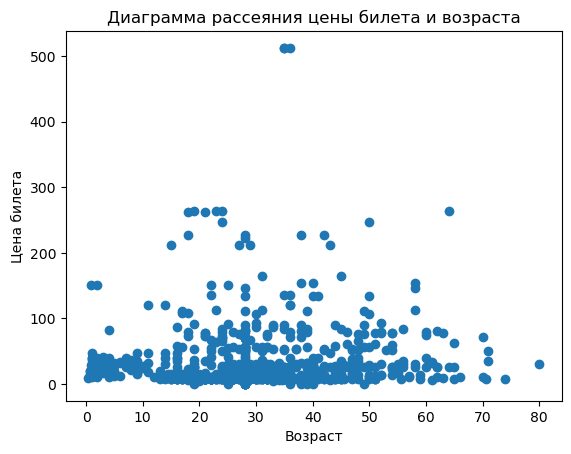

Из диаграммы и корреляции можно сделать вывод, что корреляции между возрастом и ценой билета нет, а наиболее дорогие билеты брали люди в возрасте около 30 лет


In [13]:
print('Корреляция возраста и цены билета =', train.Age.corr(train.Fare))


plt.title('Диаграмма рассеяния цены билета и возраста')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.scatter(train.Age, train.Fare)
plt.show()

print('Из диаграммы и корреляции можно сделать вывод, что корреляции между возрастом и ценой билета нет, а наиболее дорогие билеты брали люди в возрасте около 30 лет')

### 11

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? Свой ответ аргументируйте!

In [14]:
train.groupby('Pclass').sum().Survived / train.groupby('Pclass').count().Survived

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
train.groupby('Survived').mean().Fare

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Пассажиры с наиболее дорогими билетами действительно выживали чаще т.к. можно посмотреть на среднюю стоимость билета у выживших и нет. У выживших она в 2 раза больше. Кроме этого существует зависимость и от класса. Чем выше класс, тем больше людей выжило из класса

### 12

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных, а также отличный способ улучшить качество ваших выводов из проделанного анализа в целом! Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Чем может быть полезен такой признак?

In [19]:
train['Native'] = train.SibSp + train.Parch + 1

Признак может быть полезен для изучения корреляции между количеством родственников и чем-либо. Например: выжил пассажир или нет, ценой билета, его возрастом и т.д.

### 13

Теперь придумайте свой признак, который может быть полезен для анализа (несет в себе какую-то информацию), и добавьте его в таблицу. Обязательно аргументируйте, чем полезен ваш признак.

In [64]:
def Married(x):
    if x.find('Mrs.') > 0:
        return 1
    elif x.find('Miss.') > 0:
        return 0
    else:
        return np.nan

train['Married'] = train.apply(lambda x: Married(x['Name']), axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Native,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not found,S,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not found,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not found,S,1,NaN


Признак с помощью которого по имени человека можно узнать замужем этот человек, не замужем или неизвестно в каком семейном положении

### 14 не сделал

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. 

Креативность в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

*Подсказка. Например, какая фамилия была самой популярной на корабле? (Лучше не используйте этот пример, а придумайте что-то своё)*

### 15

Постройте гистограммы распределения **вещественных** признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения анализа данных и с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация. Какие выводы можно сделать из проделанной работы? 

Глубина ответа на теоретические вопросы в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

Разница есть т.к. возраст распределен нормально, а все остальные вещественные признаки нет. Кроме этого у всех остальных данных не считая возраста имеются значительные выбросы, что может повлиять на обучение с помощью различных деревьев классификации. Ситуация с нормализацией никак не изменяется не считая масштаба на графике. Из проделанной работы можно сделать вывод, что в данных существуют выбросы которые нужно устранить перед обучением на них моделей

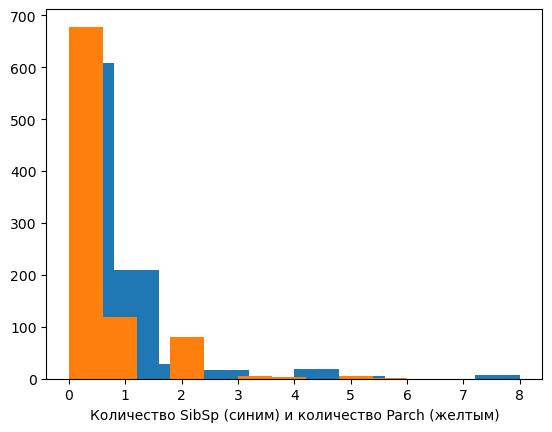

In [141]:
plt.hist(train.SibSp)
plt.hist(train.Parch)
plt.xlabel('Количество SibSp (синим) и количество Parch (желтым)')
plt.show()

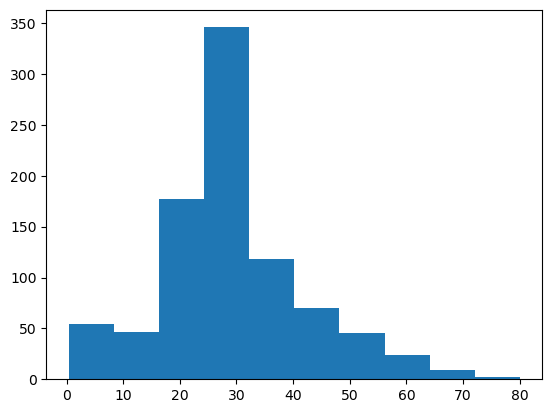

In [133]:
plt.hist(train.Age)
plt.show()

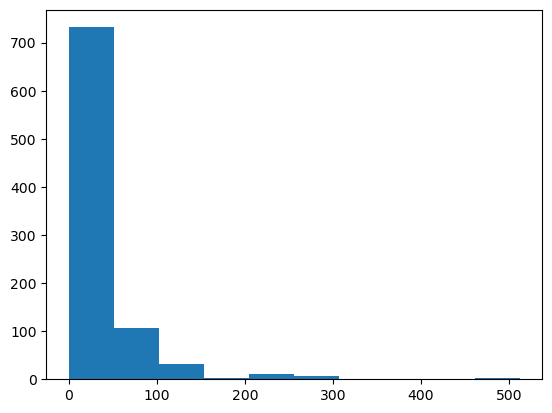

In [134]:
plt.hist(train.Fare)
plt.show()

### 16

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

In [121]:
titanic = pd.get_dummies(train)

titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Native,Married,"Name_Abbing, Mr. Anthony",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Not found,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,NaN,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1.0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0.0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,NaN,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,NaN,0,...,0,0,0,0,0,1,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,4,0.0,0,...,0,0,0,0,0,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,NaN,0,...,0,0,0,0,0,0,0,1,0,0


## Бонусная часть на машинное обучение (до 10 бонусных баллов)

Если вам понравилась часть лекции про машинное обучение и вам хочется уже сейчас немного погрузиться в это самим, вашему вниманию предлагается простое и в то же время реальное задание на машинное обучение, за которое можно набрать большое количество бонусных баллов

### 17

Решите задачу бинарной классификации по предсказанию выживаемости пассажира (то есть целевая переменная $y$ - это столбец Survived; задача - для каждого объекта (то есть пассажира), по его признаковому пространству (то есть остальным столбцам) предсказать, выживет он или нет, на основе имеющихся данных). 

Для того чтобы это сделать, отделите от обучающей выборки целевую переменную `'Survived'` и обучите на них какой-нибудь алгоритм машинного обучения для классификации (для начинающих можно рекомендовать прочитать про, пожалуй, самый простой и понятный алгоритм для первичного освоения - kNN). С помощью выбранного и обученного вами алгоритма, постройте далее предсказание на тестовой выборке, предварительно обработав ее аналогичным образом, что и обучающую. 

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'Married'], axis=1)
y = train.Survived
X = pd.get_dummies(X)
X = X.drop('Sex_female', axis=1)

variable = RandomForestClassifier(n_estimators=15, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=42)
variable.fit(X_train, Y_train)

predictions = variable.predict(X_test)

predict_percent_value = (predictions == Y_test).value_counts()

predict_percent = predict_percent_value[1] / predict_percent_value.sum()  * 100

print(round(predict_percent, 2), '% правильно предсказанных ответов в тестовой выборке')

79.27 % правильно предсказанных ответов в тестовой выборке


На основе данных, с которыми вы работали, было сделано соревнование на Kaggle, ориентированное на начинающих Data Scientists: https://www.kaggle.com/c/titanic. Вам предлагается в нем поучаствовать — если вы дошли до этого момента, то для этого осталось совсем ничего. Зарегистрируйтесь на Kaggle и примите правила соревнования. Если у вас уже есть ответ для тестовой выборки, который вы хотите отправить для оценивания и попасть в лидерборд, его нужно добавить в .csv файл и оформить нужным образом. Для этого во вкладке с данными (https://www.kaggle.com/c/titanic/data) есть пример того, как должен выглядеть этот файл ("gender_submission.csv"). Вы можете скачать и изучить его. Для вашего удобства ниже приведен код, который позволяет сформировать файл для отправки.

In [ ]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Отправьте файл на оценивание с помощью кнопки "Submit Predictions". Метрика, используемая в соревновании — accuracy. Какой получился результат? Попробуйте его улучшить! Например, попробуйте выбрать признаки, которые были бы наиболее полезны для предсказания (feature selection) или создайте новые признаки (feature generation). 

### Важно!

Вы можете найти очень много полезной информации по этому доп.заданию в https://www.kaggle.com/c/titanic/kernels и https://www.kaggle.com/c/titanic/discussion!

Но воздержитесь от плагиата кода оттуда